## Overview 
This is an example of using binary categorizing, on this nootebook we will use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Data description
One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and the results of whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger.

Using the patterns we will find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In [183]:
# We will start by importing the data so we can start working with it 

import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")


In [222]:
# Now it's time to show the data we're working with 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# We have the following features on the data frame 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The variables meaning is the following: 

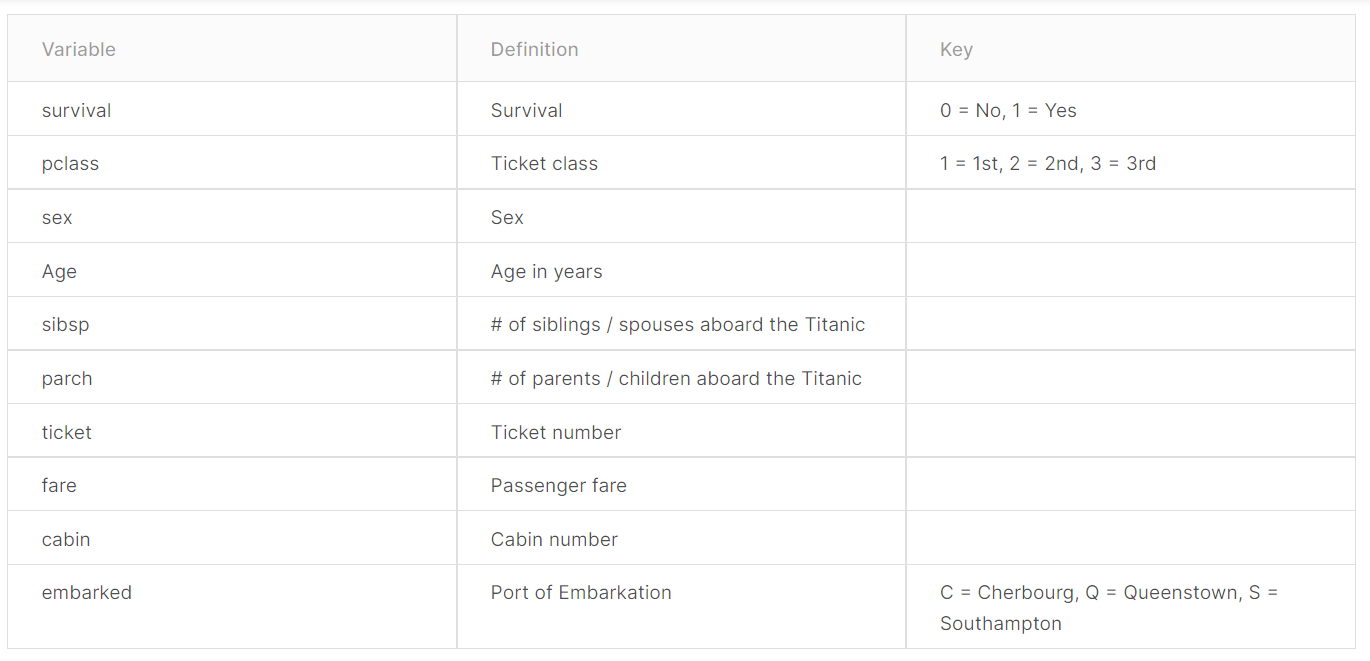

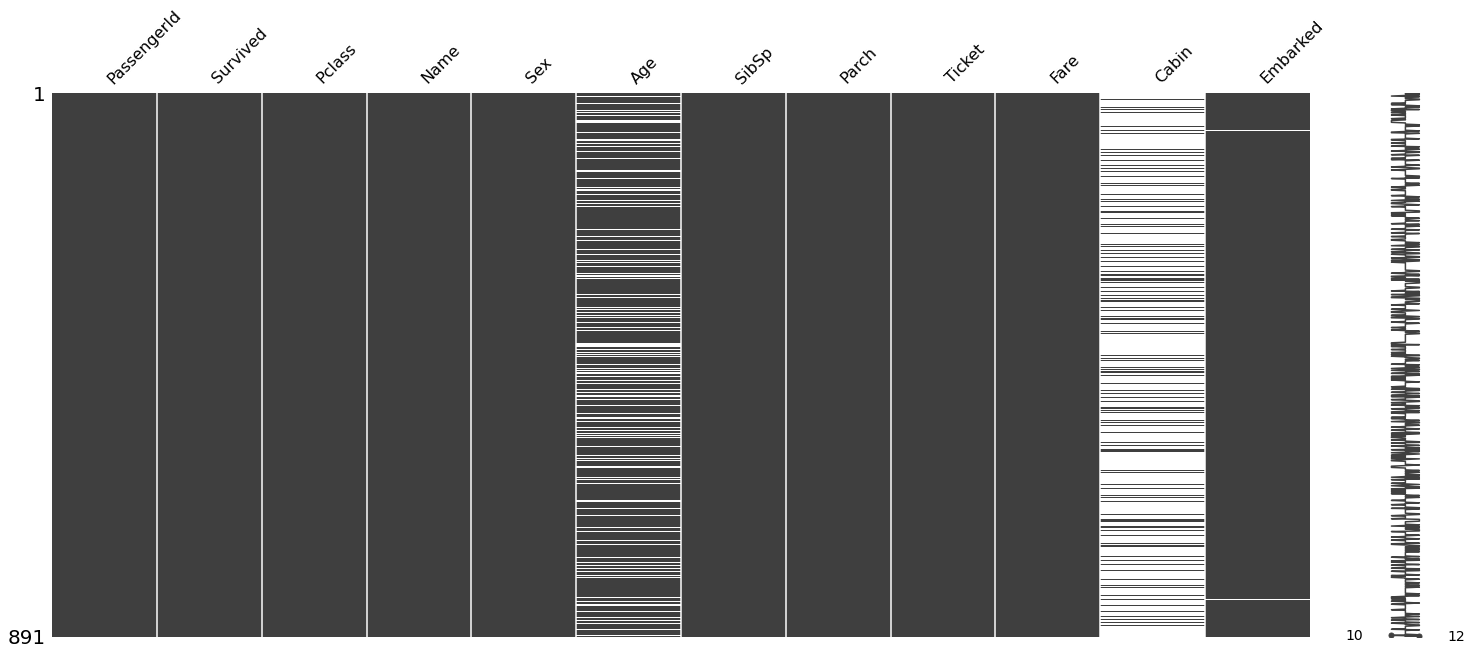

In [3]:
# We already see there some values that are not available in the data frame however we will look for missing values 

import missingno 
import matplotlib.pyplot as plt 

missingno.matrix(df)

In [4]:
# It's clear that the features Age and Cabin don't have all the data
# We can check how many missing values we have on these two features 
df["Age"].isnull().sum(), df['Cabin'].isnull().sum()

(177, 687)

 We cannot work with the feature Cabin since there's too many missing values and we can try to predict a value for the age since I consider it important. To estimate the age we will use the information of the columns sibsp and parch, # of siblings / spouses abord the Titanic and # of parents/ children aboard the Titanic.  


In [6]:
# We start by dropping the column Cabin 
df = df.drop("Cabin", axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
# Now we will get the rows where there's no age so we can try to estimate the age 
ages_missing = df[df['Age'].isna()]

In [ ]:
# We have 52 survivers on the 177 examples without age 
ages_missing[ages_missing.Survived==1].sum()
ages_missing[ages_missing.Survived==1]


From what I've checked on the current data it's difficult to estimate the age, so we will solve the problem with three solutions:  
1. Drop the age column and work with all the data. (This is going to affect if the age was important on the survival)
2. Drop the rows where the age is missing and work with all the columns. 
3. Propose the average to fill the missing ages. 

In [ ]:
# Now let's check the values of the columns are logical and according to what is expected 
#We verify the names arre correctly on objects columns
for col in df:
  print(df[col].unique())


We can observe in the data that the ticket number, the name and the passanger id are not useful and diverse so we will not work with these features 


In [70]:
df_1 = df.drop(["PassengerId",'Name','Ticket'], axis = 1)

In [76]:
df_1 = df_1.drop("Cabin", axis=1)

In [77]:
df_1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Visualize the data 
Now we will make some graphs to show the tendency with the survival between the features 


In [11]:
# We will star to check if the ticket class is somehow related with the survival
# We will create a function to do this plots 
def plot_survival(column_name, t):
  df_aux = pd.DataFrame()
  df_aux["Total"]=df.groupby(column_name).size()
  df_aux['Survived'] = df.groupby(column_name).sum()['Survived']
  df_aux["Percentage"] = round(df_aux["Survived"]/df_aux["Total"]*100,2)
  

  plt.figure(figsize=(10, 4))
  
  plt.subplot(1,2,1)
  df_aux['Survived'].plot(kind=t)
  df_aux['Total'].plot(kind=t, alpha=0.5, title= "Survivors per " + str(column_name))
  plt.legend()
  
  plt.subplot(1,2,2)
  df_aux['Percentage'].plot(kind = t, title= "Percentage of survivors per " + str(column_name), ylabel="Percentage of survivors")
  

  plt.show()


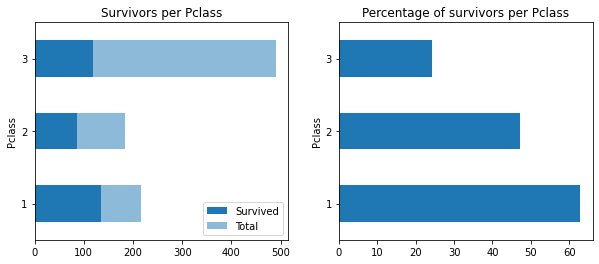

In [12]:
  plot_survival("Pclass", "barh")

It's clear to see the differences between people that survived according to their ticket class, the percentage of survivor in the upper class was much bigger than the one for the third class 


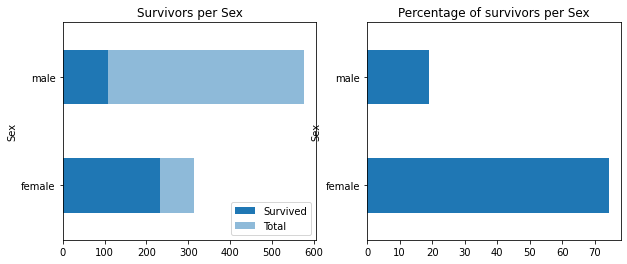

In [13]:
 plot_survival('Sex', "barh")

More than 70 percent of women survived compared to the less than 20 percent of men.
Now to work with ages it's neccesary to drop the rows where no age is given and to work with ranges.

In [78]:
# We will drop the rows where we don't have any Age available  
df_1 = df_1.dropna(subset=["Age"])


In [152]:
# We will define a function to create intervals according to the column needed 
def create_interval (column_name, column_interest, no_interval):

# We find the min and max values to establish the interval length and the number of data n the interval   
  max_value = round(df_1[column_name].max())
  min_value = round(df_1[column_name].min())
  no_values = df_1[column_name].size

# We get the location of the columns of interest within the data frame for the iloc 
  x = df_1.columns.get_loc(column_name)
  y = df_1.columns.get_loc(column_interest)

  interval_space = round((max_value-min_value)/no_interval)
  interval_values = round(no_values/no_interval)

# We organize the data from the lowest to the highest value 
  df_sorted = df_1.sort_values(by = column_name , ascending = True)
  cte = 0

  interval_x = pd.DataFrame()
  interval_y = pd.DataFrame()

# We create the intervals in a cycle 
  for i in range(no_interval):

    interval_x[i] = df_sorted.iloc[ min_value + cte : interval_values + cte  , x].values
    interval_y[i] = df_sorted.iloc[ min_value + cte : interval_values + cte , y].values 
    cte = cte + interval_values
  
  print(f"The interval is divide each {interval_space}")

  return (interval_x , interval_y)

In [217]:
interval_agex,interval_agey = create_interval("Age", "Survived", 4)

The interval is divide each 20


In [207]:
df_res = pd.DataFrame()
df_res["less_20"] = interval_agey[0].value_counts()
df_res["more_20_less_40"] = interval_agey[1].value_counts()
df_res["more_40_less_60"] = interval_agey[2].value_counts()
df_res ["more_60"] = interval_agey[3].value_counts()
df_res = df_res.T

In [245]:
df_res["Percentage of survivors"]= (df_res[1]/(df_res[0]+df_res[1]))*100

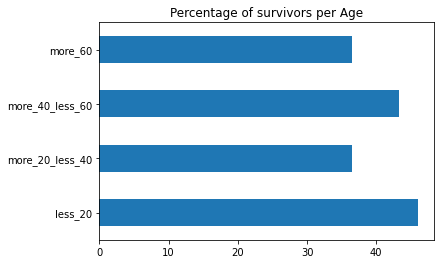

In [246]:
df_res['Percentage of survivors'].plot(kind = "barh" , title= "Percentage of survivors per Age");

We can see the children and teenagers with age less than 20 had more chanses of survive, followed by the people between 40 and 60.


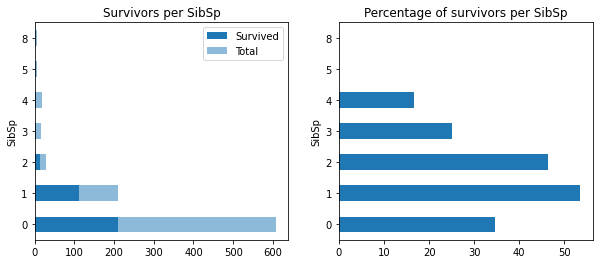

In [218]:
# Now we will check the rest of the parameters 'SibSp', 'Parch', 'Fare',
#       'Embarked'  
plot_survival("SibSp", "barh")

The parameter # of siblings / spouses aboard the Titanic gives us the clue that people with  0, 1 or 2 siblings had more chances to survive.   

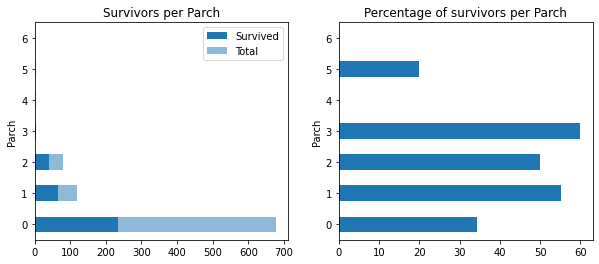

In [219]:
plot_survival("Parch", "barh")

Apparently having at least 1,2 or 3 parents/children resulted in more chances to survive. 

In [229]:
# To review the relation of the fare with the survivors we will create intervals 
# We will create four intervals
interval_farex,interval_farey = create_interval("Fare", "Survived", 4)

The interval is divide each 128


In [ ]:
interval_farey

In [243]:
df_fare = pd.DataFrame()
df_fare["less_128"] = interval_farey[0].value_counts()
df_fare["more_128_less_256"] = interval_farey[1].value_counts()
df_fare["more256__less_384"] = interval_farey[2].value_counts()
df_fare ["more_384"] = interval_farey[3].value_counts()
df_fare = df_fare.T
df_fare["Percentage of survivors"]= (df_fare[1]/(df_fare[0]+df_fare[1]))*100

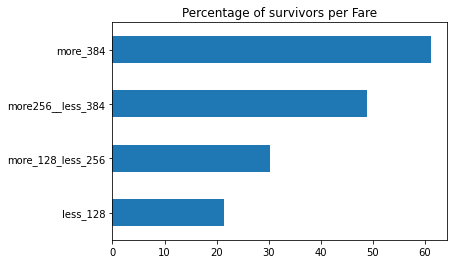

In [247]:
df_fare['Percentage of survivors'].plot(kind = "barh" , title= "Percentage of survivors per Fare");

We can see a clear correspondance between the fare and the label we're interested. 

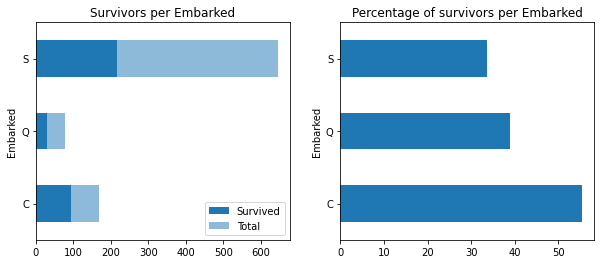

In [248]:
# Lastly we will check how te data of the port of Embarkation relates with the label 
plot_survival("Embarked", "barh")

We can observe the people that embarked on Cherbour survived the most. Now it's time to create the model to predict the label. From the observtions we can say:

1. The sex, ticket class, passanger fare and port of embarkation are the parameters that influence the most on the prediction. 
2. The number of siblings/spouses, number of children/parents and age influence in smaller meadure compared to the parameters in point one. 

## Create the model 

In [519]:
# We start by creating the data we will use in the model 

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


df_train = df_train.drop(["PassengerId",'Name','Ticket','Cabin'], axis = 1)
df_train = df_train.dropna(subset=["Age","Embarked"])
#df_test = df_test.drop(['Name','Ticket'], axis = 1)
#df_test = df_test.dropna(subset=["Age","Fare"])



In [520]:
# Now it's time to create the vectors and matrixes for the model.
X_train = df_train.drop("Survived", axis=1)
y_train = df_train["Survived"]  
X_test = df_test.drop("Cabin", axis=1)


In [521]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [522]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [523]:
# We will transform our data to make it more useful 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#We can use MinMaxScaler or StandardScaler

#Create a column transformer 
ct= make_column_transformer(
    (MinMaxScaler(), ["Age", "Fare"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Pclass","Sex","SibSp","Parch","Embarked"])
)

#Create a column transformer for test data
ct1= make_column_transformer(
    (MinMaxScaler(), ["Age", "Fare"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Pclass","Sex","SibSp","Parch","Embarked"])
)

# Fit the column transformer to our training data
ct.fit(X_train)
ct1.fit(X_test)


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'Fare']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked'])])

In [524]:
#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [496]:
import tensorflow as tf 
# Lets recreate a model to fit on the training data and evaluate on the train test 

# Create the seed 
tf.random.set_seed(42)

#Create the model (same as last model)

#1. Create a model with a non-linear activation 
model_1 = tf.keras.Sequential([
                                tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(2, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#2. Compile the model 
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics=["Recall"])

#3. Fit the model 
model_1.fit(X_train_normal,y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.1726 - recall: 0.5035
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1367 - recall: 0.7083
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1241 - recall: 0.5833
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1200 - recall: 0.5660
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1171 - recall: 0.5833
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1166 - recall: 0.5694
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1145 - recall: 0.6319
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1139 - recall: 0.6181
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1128 - recall: 0.5868
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1120 - recall: 0.6493
Epoch 11/100
23/23 [=========

In [497]:
# Make predictions with the trained data 
y_preds = model_1.predict(X_train_normal)


 We will create a confusion matrix to chet where the model is not working correctly 

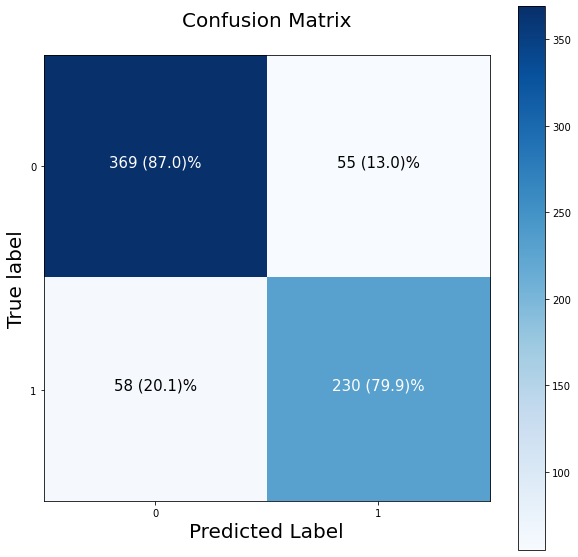

In [498]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matrix 

import itertools 

figsize = (10,10)

# Create the confusion matrix 
cm = confusion_matrix(y_train, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalize our confusion matrix 
n_classes = cm.shape[0]


# Let's prettify it 
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Creae classes 
classes= False 

if classes:
  labels = classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes 
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2.

#Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f})%",
           horizontalalignment="center",
           color="black" if cm[i, j] < threshold else "white", 
           size=15)

In [526]:
y_preds_test = model_1.predict(X_test_normal)

In [527]:
y_preds_test = tf.squeeze(y_preds_test)

In [556]:
y= np.reshape(y_preds_test,418)
y= y.round()

In [557]:
df_result = (X_test['PassengerId'], y)

In [558]:
df_result = pd.DataFrame (data=df_result)

In [559]:
df_result = df_result.T

In [560]:
df_result.columns = ["PassengerId","Survived"]

Now we will export the results.

In [562]:
df_result.to_csv("submission.csv")